In [24]:
!pip install scipy

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
#Chargement des données
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#data cleaning
df = df.dropna()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
#Analyse des caractéristiques des variables
descriptive_stats = df.describe()
print(descriptive_stats)

                 id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865374      0.091872       0.049501   
std    20995.098457    22.555115      0.288875       0.216934   
min       77.000000     0.080000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000  
50%            91.680000    28.100000     0.000000  
75%           113.570000    33.100000     0

In [5]:
#Analyse bivariée

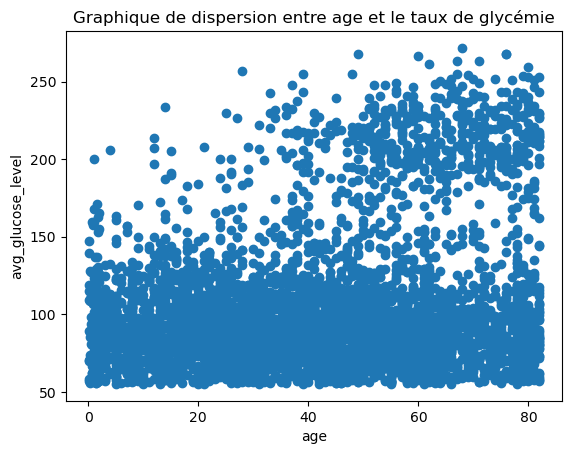

In [6]:
plt.scatter(df['age'], df['avg_glucose_level'])
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.title('Graphique de dispersion entre age et le taux de glycémie')
plt.show()

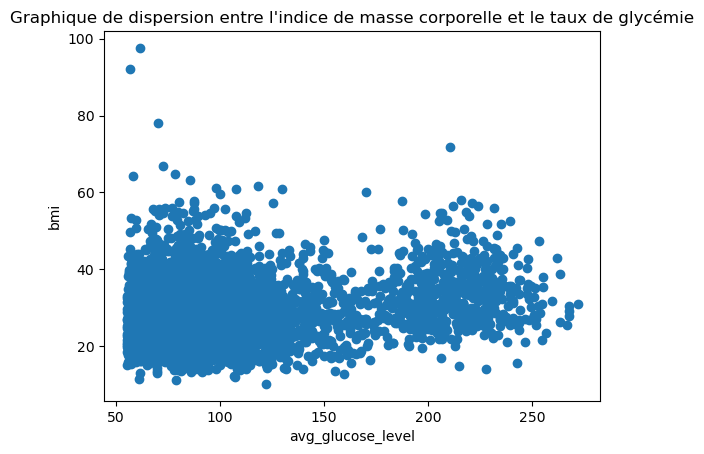

In [7]:
plt.scatter(df['avg_glucose_level'], df['bmi'])
plt.xlabel('avg_glucose_level')
plt.ylabel('bmi')
plt.title('Graphique de dispersion entre l\'indice de masse corporelle et le taux de glycémie')
plt.show()

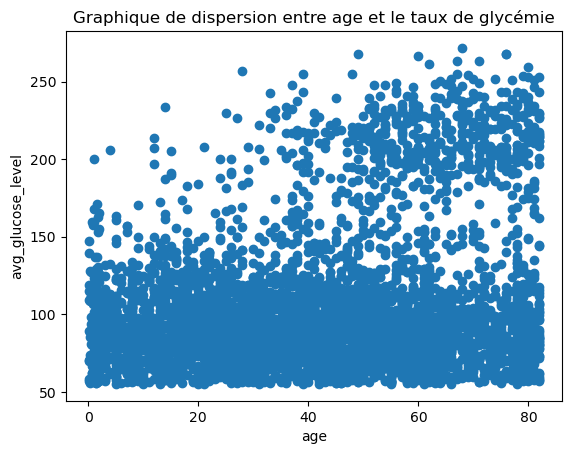

In [8]:
plt.scatter(df['age'], df['avg_glucose_level'])
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.title('Graphique de dispersion entre age et le taux de glycémie')
plt.show()

In [9]:
cross_table = pd.crosstab(df['hypertension'], df['stroke'])
print(cross_table)

stroke           0    1
hypertension           
0             4309  149
1              391   60


In [10]:
cross_table = pd.crosstab(df['heart_disease'], df['stroke'])
print(cross_table)

stroke            0    1
heart_disease           
0              4497  169
1               203   40


In [11]:
cross_table = pd.crosstab(df['ever_married'], df['stroke'])
print(cross_table)

stroke           0    1
ever_married           
No            1682   23
Yes           3018  186


In [12]:
cross_table = pd.crosstab(df['work_type'], df['stroke'])
print(cross_table)

stroke            0    1
work_type               
Govt_job        602   28
Never_worked     22    0
Private        2684  127
Self-employed   722   53
children        670    1


In [13]:
cross_table = pd.crosstab(df['Residence_type'], df['stroke'])
print(cross_table)

stroke             0    1
Residence_type           
Rural           2319  100
Urban           2381  109


In [14]:
cross_table = pd.crosstab(df['smoking_status'], df['stroke'])
print(cross_table)

stroke              0   1
smoking_status           
Unknown          1454  29
formerly smoked   780  57
never smoked     1768  84
smokes            698  39


In [15]:
#Recherche de corrélations

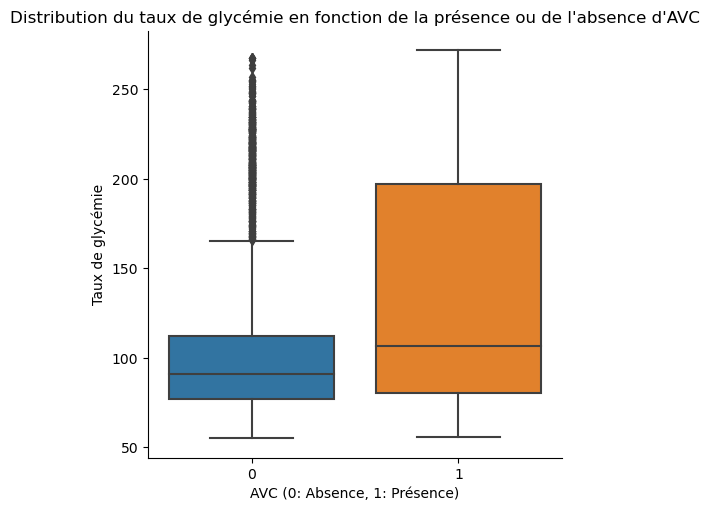

Statistique du test du Chi-carré: 4052.406652838575
p-value: 0.011796987703514665


In [42]:
#Corrélation taux de glycémie et AVC
sns.catplot(x='stroke', y='avg_glucose_level', kind='box', data=df)
plt.xlabel('AVC (0: Absence, 1: Présence)')
plt.ylabel('Taux de glycémie')
plt.title('Distribution du taux de glycémie en fonction de la présence ou de l\'absence d\'AVC')
plt.show()

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['avg_glucose_level'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)

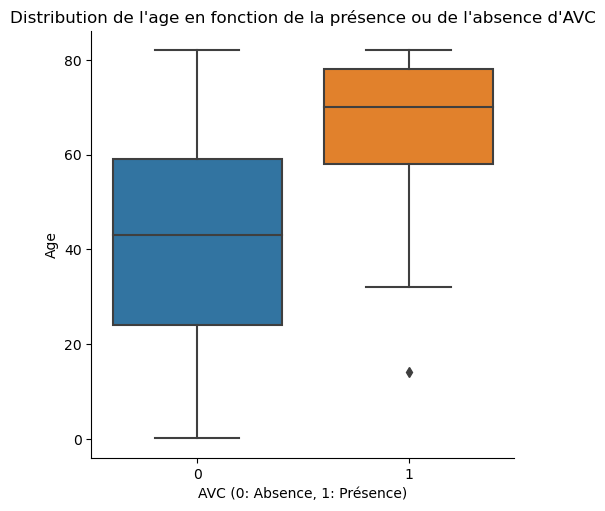

Statistique du test du Chi-carré: 435.43002228937314
p-value: 1.9452736798143034e-42


In [17]:
#Corrélation age et AVC
sns.catplot(x='stroke', y='age', kind='box', data=df)
plt.xlabel('AVC (0: Absence, 1: Présence)')
plt.ylabel('Age')
plt.title('Distribution de l\'age en fonction de la présence ou de l\'absence d\'AVC')
plt.show()

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['age'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)

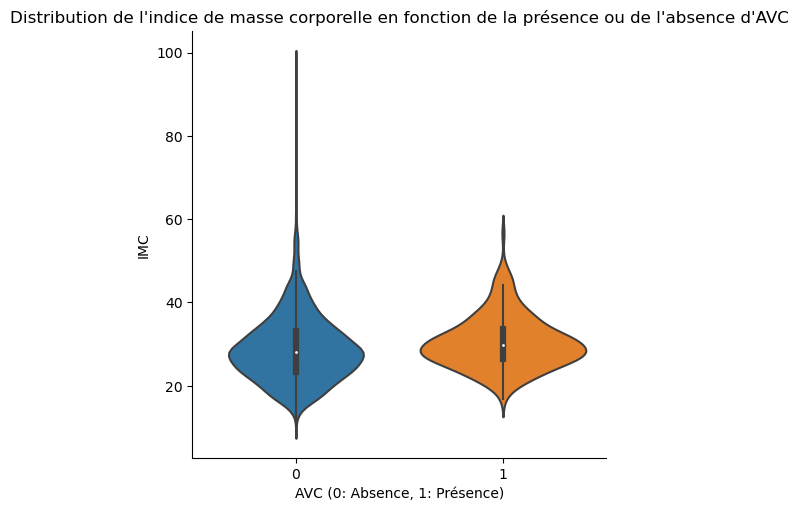

Statistique du test du Chi-carré: 405.96640340084764
p-value: 0.641453321954113


In [18]:
#Corrélation indice de masse corporelle et AVC
sns.catplot(x='stroke', y='bmi', kind='violin', data=df)
plt.xlabel('AVC (0: Absence, 1: Présence)')
plt.ylabel('IMC')
plt.title('Distribution de l\'indice de masse corporelle en fonction de la présence ou de l\'absence d\'AVC')
plt.show()


chi2, p, _, _ = chi2_contingency(pd.crosstab(df['bmi'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)


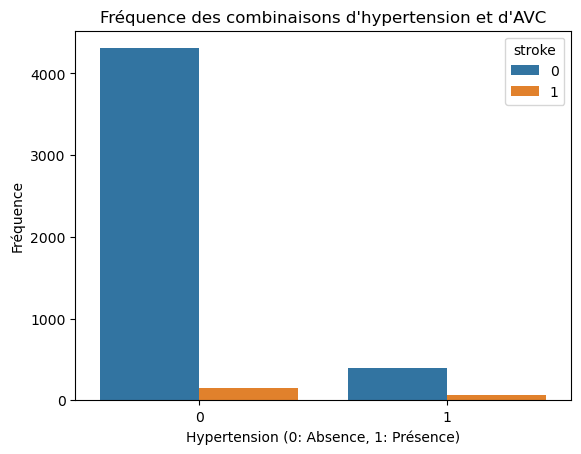

Statistique du test du Chi-carré: 97.2749949311716
p-value: 6.033751208728256e-23


In [19]:
#corrélation hypertension et AVC
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.xlabel('Hypertension (0: Absence, 1: Présence)')
plt.ylabel('Fréquence')
plt.title('Fréquence des combinaisons d\'hypertension et d\'AVC')
plt.show()

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['hypertension'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)

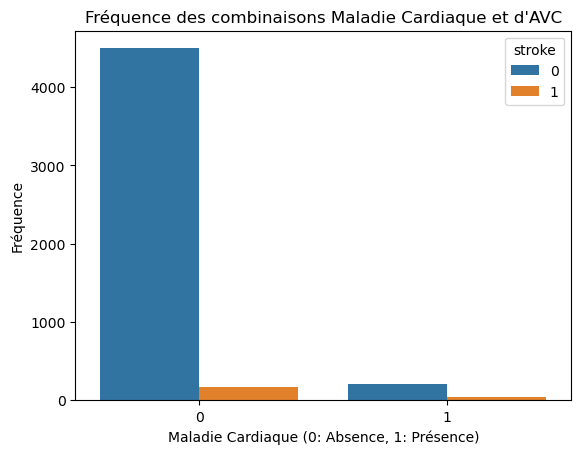

Statistique du test du Chi-carré: 90.2795595563918
p-value: 2.0677783295228626e-21


In [20]:
#corrélation maladie cardiaque et AVC
sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.xlabel('Maladie Cardiaque (0: Absence, 1: Présence)')
plt.ylabel('Fréquence')
plt.title('Fréquence des combinaisons Maladie Cardiaque et d\'AVC')
plt.show()

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['heart_disease'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)

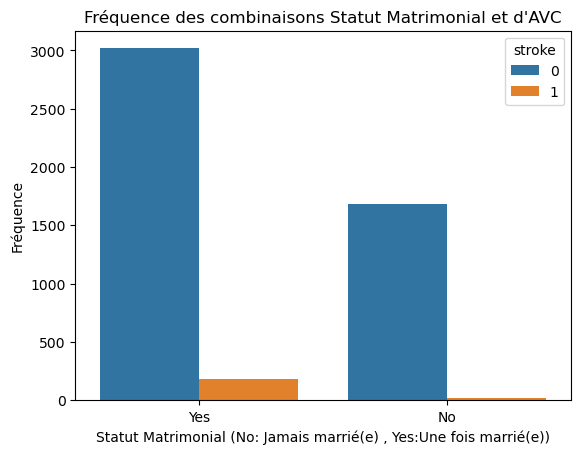

Statistique du test du Chi-carré: 53.12593819801626
p-value: 3.1283412849388787e-13


In [21]:
#corrélation statut matrimonial et AVC
sns.countplot(x='ever_married', hue='stroke', data=df)
plt.xlabel('Statut Matrimonial (No: Jamais marrié(e) , Yes:Une fois marrié(e))')
plt.ylabel('Fréquence')
plt.title('Fréquence des combinaisons Statut Matrimonial et d\'AVC')
plt.show()

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['ever_married'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)

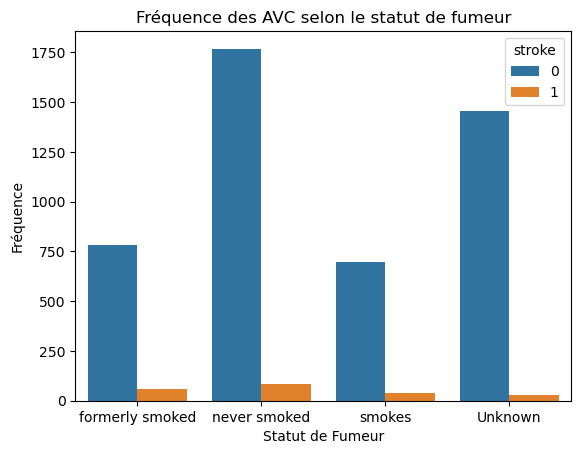

Statistique du test du Chi-carré: 34.9434924570628
p-value: 1.2522021032753853e-07


In [22]:
#corrélation Fumer et AVC
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.xlabel('Statut de Fumeur')
plt.ylabel('Fréquence')
plt.title('Fréquence des AVC selon le statut de fumeur')
plt.show()

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['smoking_status'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)

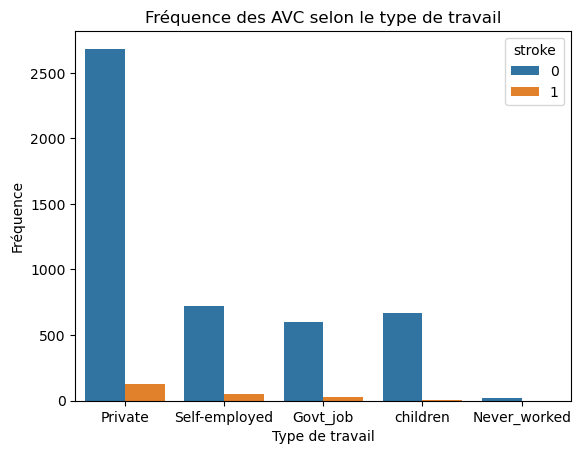

Statistique du test du Chi-carré: 41.95353832836521
p-value: 1.7055668658884947e-08


In [23]:
#corrélation type de travail et AVC
sns.countplot(x='work_type', hue='stroke', data=df)
plt.xlabel('Type de travail')
plt.ylabel('Fréquence')
plt.title('Fréquence des AVC selon le type de travail')
plt.show()

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['work_type'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)

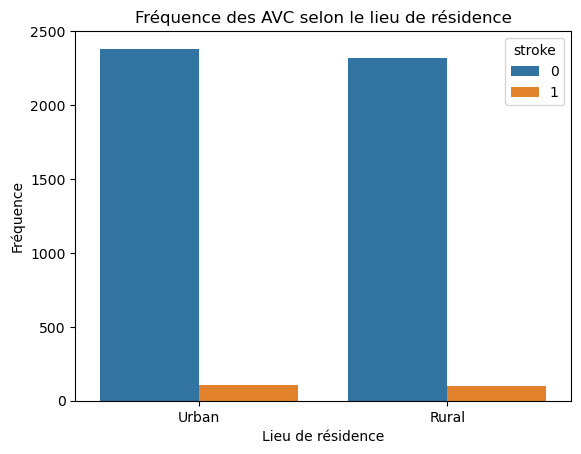

Statistique du test du Chi-carré: 0.12382469623434333
p-value: 0.7249227580411615


In [43]:
#corrélation lieuu d'habitation et AVC
sns.countplot(x='Residence_type', hue='stroke', data=df)
plt.xlabel('Lieu de résidence')
plt.ylabel('Fréquence')
plt.title('Fréquence des AVC selon le lieu de résidence')
plt.show()

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['Residence_type'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)

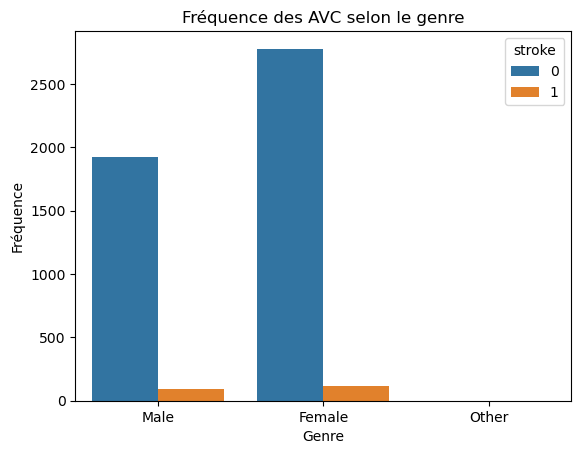

Statistique du test du Chi-carré: 0.27843022275621393
p-value: 0.8700408526403285


In [25]:
#corrélation genre et AVC
sns.countplot(x='gender', hue='stroke', data=df)
plt.xlabel('Genre')
plt.ylabel('Fréquence')
plt.title('Fréquence des AVC selon le genre')
plt.show()

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['gender'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)

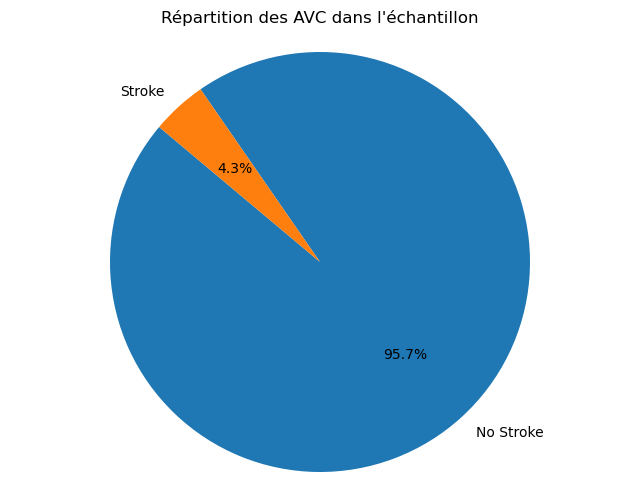

In [26]:
# répartition des AVC
stroke_counts = df['stroke'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=140)
plt.title('Répartition des AVC dans l\'échantillon')
plt.axis('equal')
plt.show()

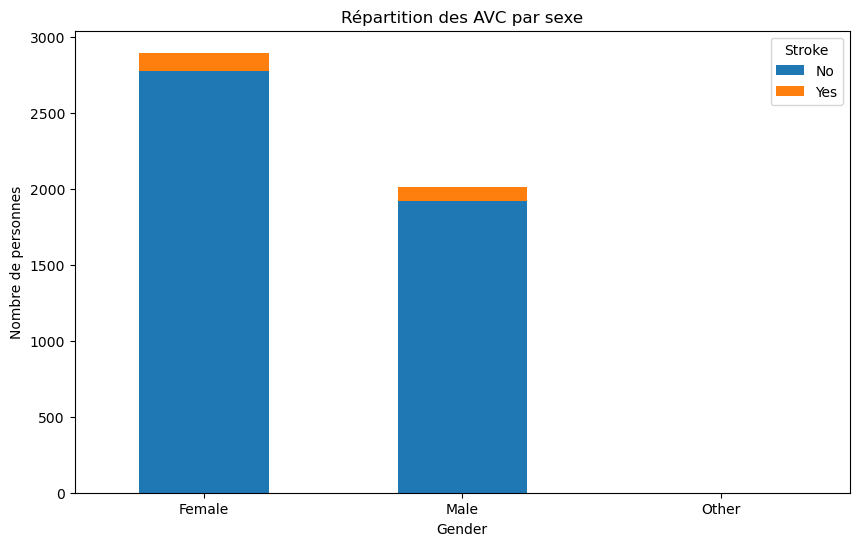

In [27]:
# fréquence des AVC par sexe
stroke_by_gender = df.groupby('gender')['stroke'].value_counts().unstack()
stroke_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Répartition des AVC par sexe')
plt.xlabel('Gender')
plt.ylabel('Nombre de personnes')
plt.xticks(rotation=0)
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

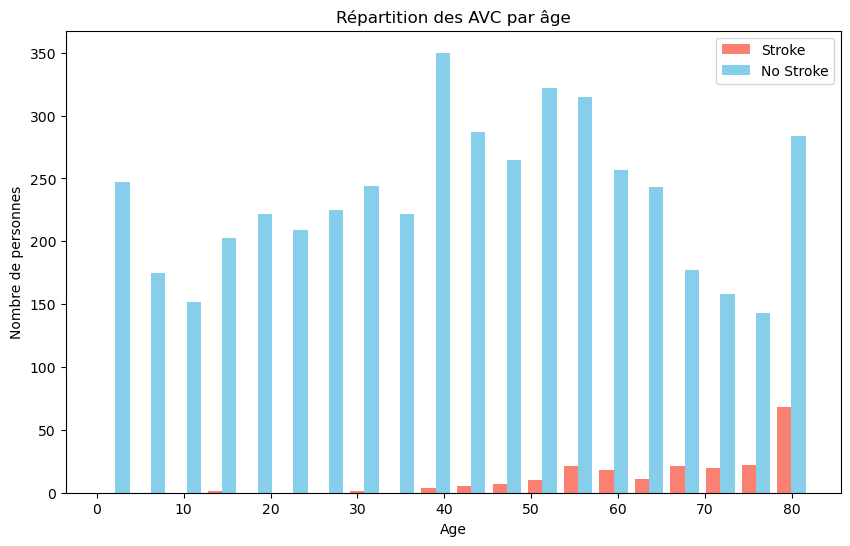

Statistique du test du Chi-carré: 435.43002228937314
p-value: 1.9452736798143034e-42


In [45]:
# Séparer les données en personnes ayant eu un AVC et celles n'en ayant pas eu
stroke_yes = df[df['stroke'] == 1]['age']
stroke_no = df[df['stroke'] == 0]['age']
plt.figure(figsize=(10, 6))
plt.hist([stroke_yes, stroke_no], bins=20, color=['salmon', 'skyblue'], label=['Stroke', 'No Stroke'])
plt.title('Répartition des AVC par âge')
plt.xlabel('Age')
plt.ylabel('Nombre de personnes')
plt.legend()
plt.show()

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['age'], df['stroke']))
print("Statistique du test du Chi-carré:", chi2)
print("p-value:", p)

In [29]:
#Corrélation entre les variables l' AVC

C:\Users\mercz\AppData\Local\Temp\ipykernel_16308\269793603.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


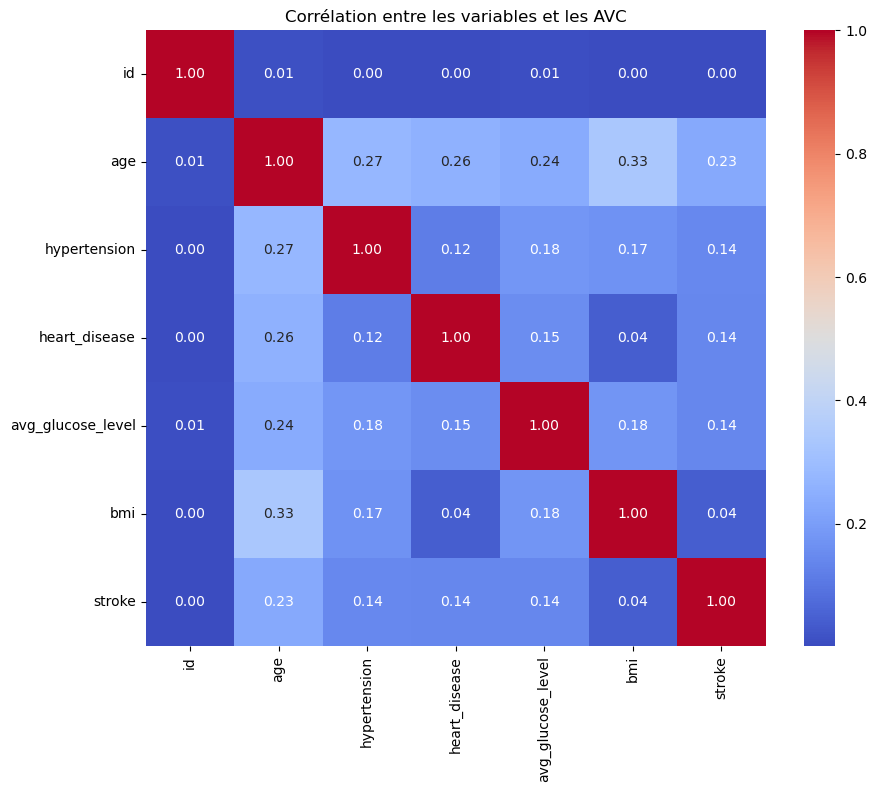

In [30]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre les variables et les AVC')
plt.show()

C:\Users\mercz\AppData\Local\Temp\ipykernel_16308\454356017.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


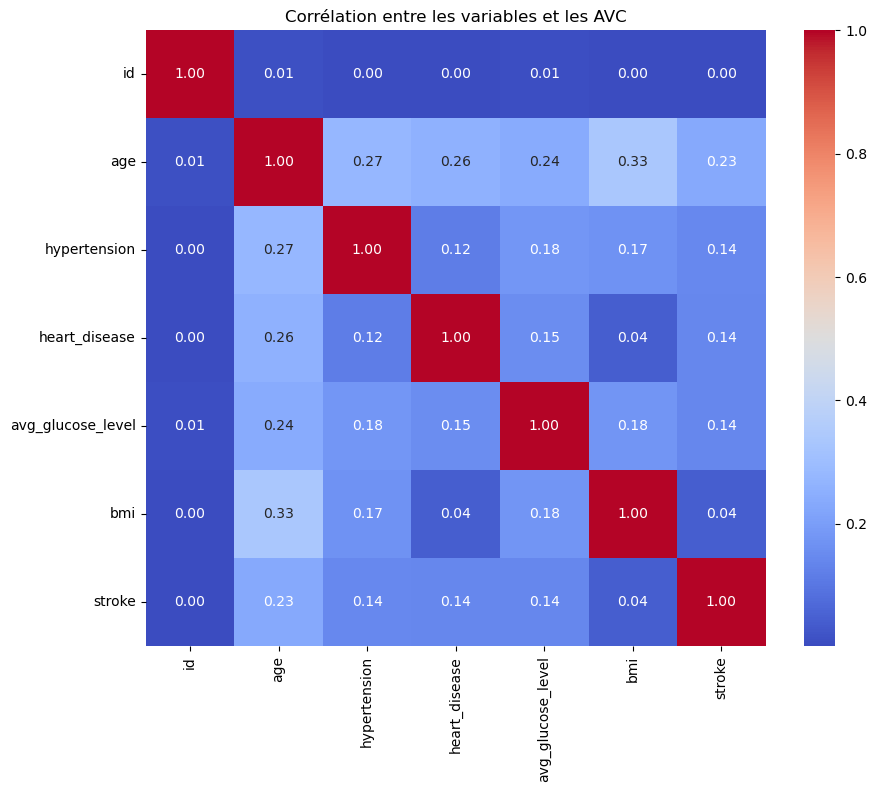

In [31]:
correlation_matrix = df.corr()

# Créer une carte de chaleur avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre les variables et les AVC')
plt.show()


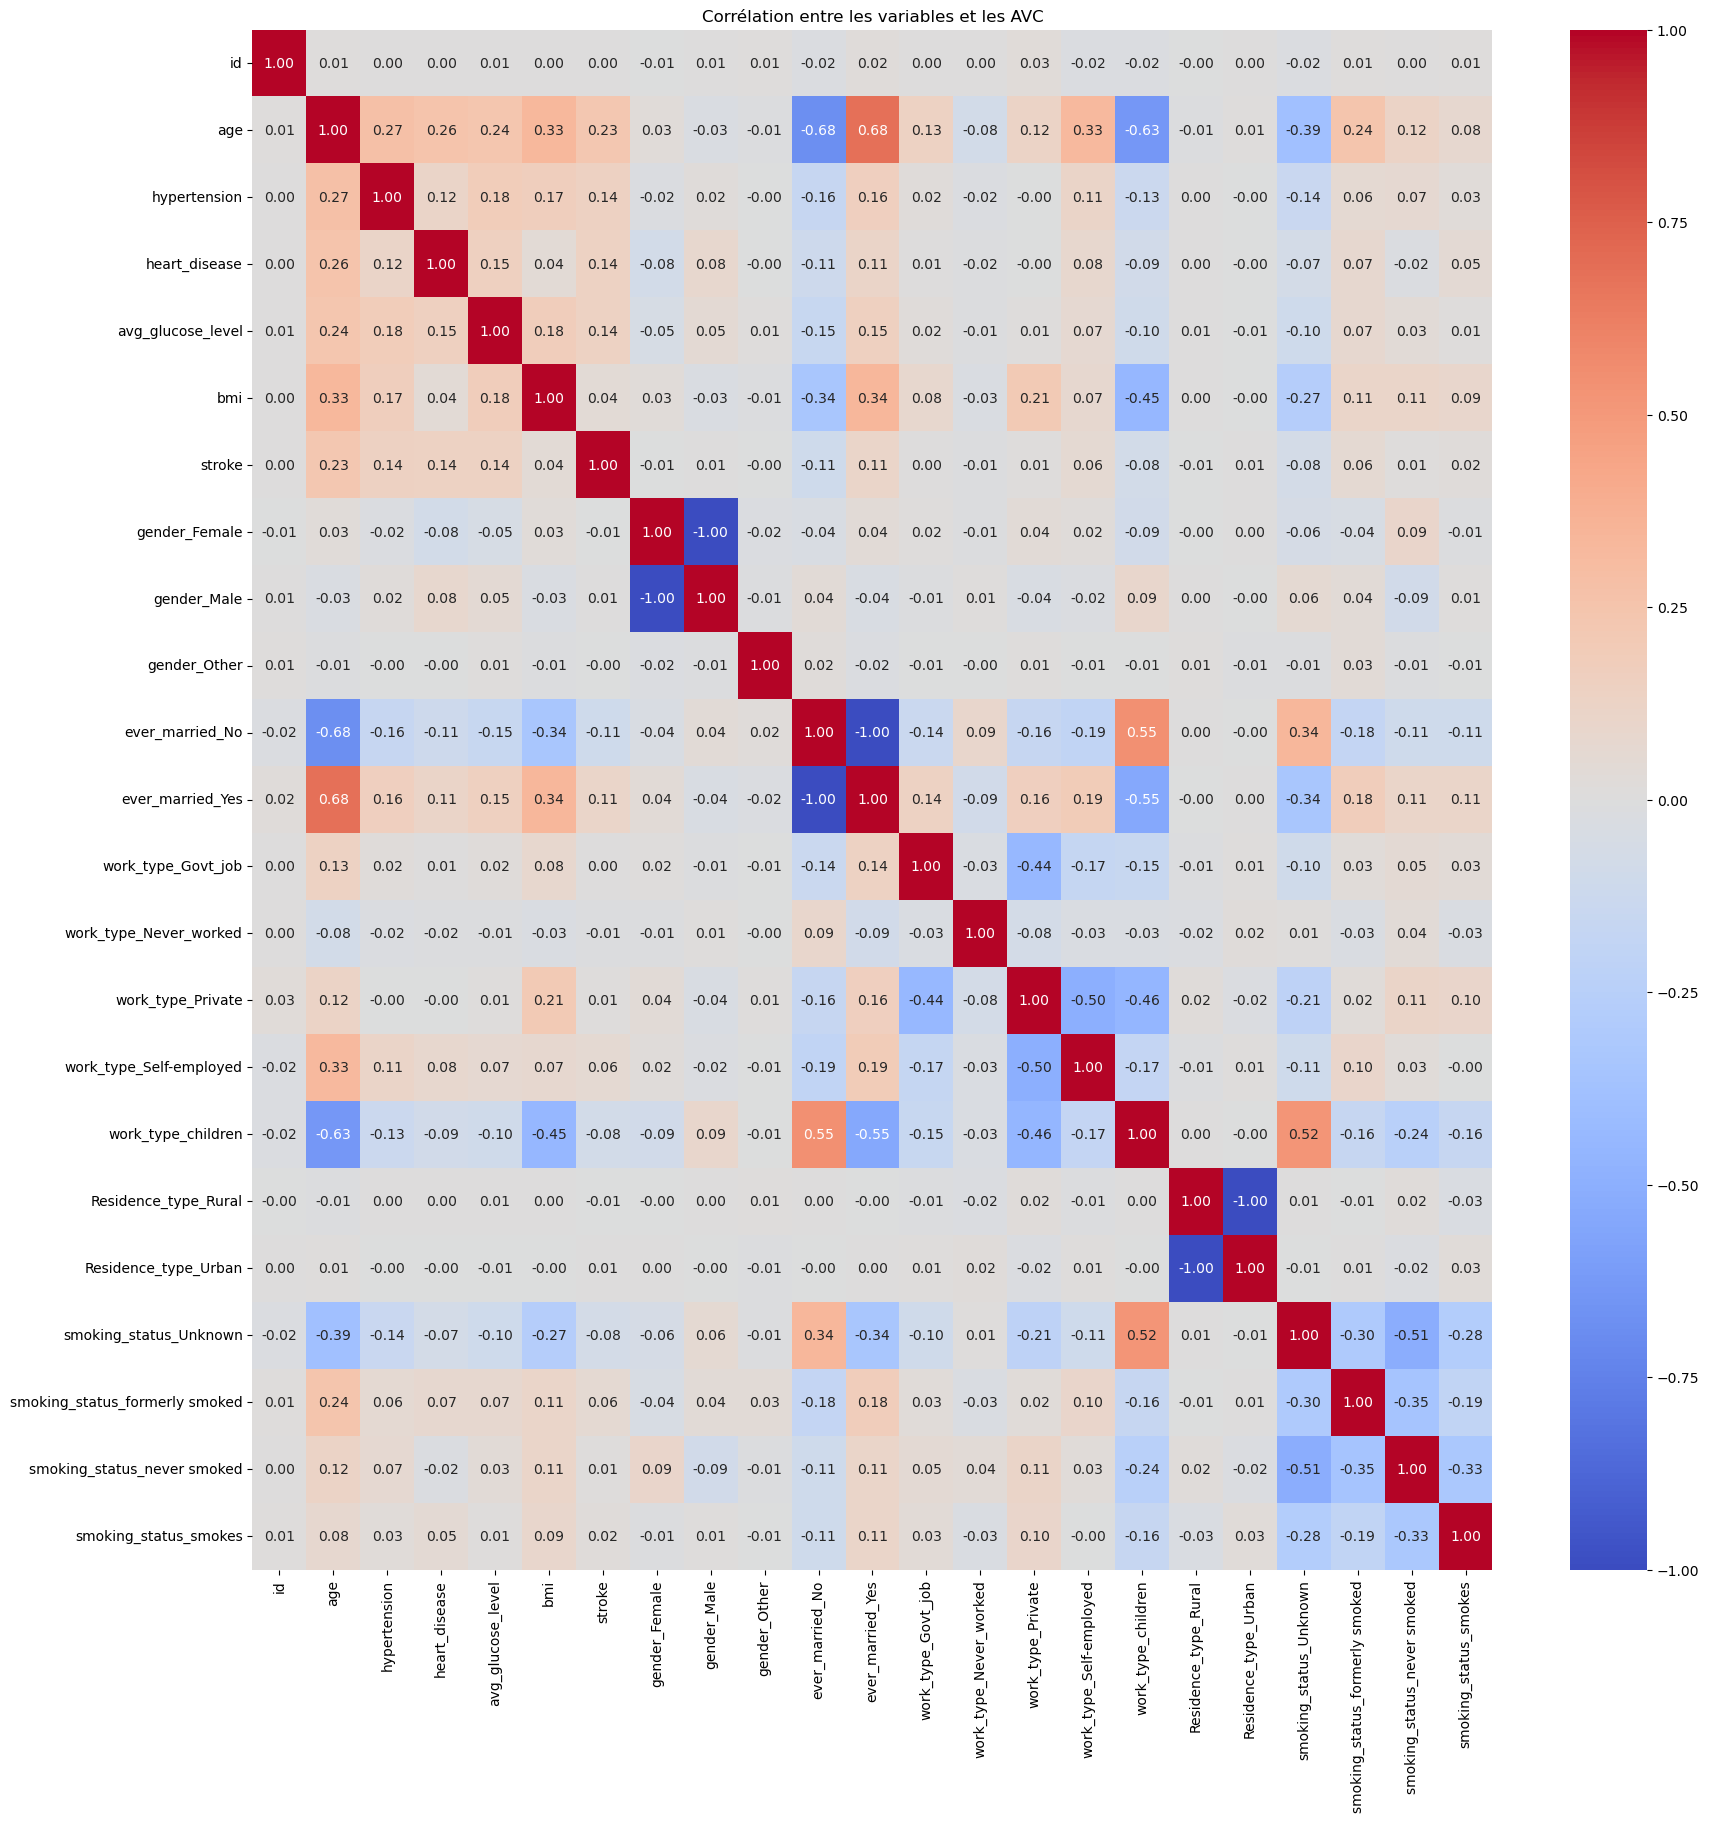

In [32]:
df_dummies = pd.get_dummies(df)
correlation_matrix = df_dummies.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre les variables et les AVC')
plt.show()

[67.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69.0, 78.0, 81.0, 61.0, 54.0, 79.0, 50.0, 64.0, 75.0, 60.0, 71.0, 52.0, 79.0, 82.0, 71.0, 80.0, 65.0, 69.0, 57.0, 42.0, 82.0, 80.0, 48.0, 82.0, 74.0, 72.0, 58.0, 49.0, 78.0, 54.0, 82.0, 60.0, 76.0, 58.0, 81.0, 39.0, 79.0, 77.0, 63.0, 82.0, 73.0, 54.0, 56.0, 80.0, 67.0, 45.0, 78.0, 70.0, 76.0, 59.0, 80.0, 67.0, 66.0, 63.0, 52.0, 80.0, 80.0, 79.0, 43.0, 59.0, 79.0, 68.0, 54.0, 61.0, 70.0, 47.0, 74.0, 79.0, 81.0, 57.0, 80.0, 45.0, 78.0, 70.0, 58.0, 57.0, 69.0, 64.0, 77.0, 74.0, 81.0, 57.0, 50.0, 54.0, 79.0, 53.0, 79.0, 80.0, 45.0, 68.0, 71.0, 61.0, 74.0, 38.0, 77.0, 58.0, 53.0, 80.0, 56.0, 72.0, 80.0, 82.0, 73.0, 78.0, 69.0, 68.0, 71.0, 76.0, 76.0, 76.0, 75.0, 82.0, 59.0, 74.0, 69.0, 72.0, 66.0, 78.0, 57.0, 70.0, 68.0, 80.0, 68.0, 55.0, 77.0, 50.0, 57.0, 71.0, 81.0, 78.0, 70.0, 78.0, 56.0, 79.0, 81.0, 60.0, 80.0, 72.0, 80.0, 78.0, 81.0, 46.0, 59.0, 32.0, 61.0, 63.0, 63.0, 82.0, 82.0, 65.0, 51.0, 59.0, 68.0, 72.0, 59.0, 70.0, 69.0, 74.0, 80.0, 77.0, 78.

737


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000
